<a href="https://colab.research.google.com/github/sahar7888/NLP/blob/main/zero_shot_classification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%% packages
from transformers import pipeline
import pandas as pd

In [2]:
#%% Classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [3]:
documents = ["It was about eleven o’clock in the morning, mid October, with the sun not shining and a look of hard wet rain in the clearness of the foothills. I was wearing my powder-blue suit, with dark blue shirt, tie and display handkerchief, black brogues, black wool socks with dark blue clocks on them. I was neat, clean, shaved and sober, and I didn’t care who knew it. I was everything the well-dressed private detective ought to be. I was calling on four million dollars.",
             "When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.",
             "Welcome. And congratulations. I am delighted that you could make it. Getting here wasn’t easy, I know. In fact, I suspect it was a little tougher than you realize. To begin with, for you to be here now trillions of drifting atoms had somehow to assemble in an intricate and curiously obliging manner to create you. It’s an arrangement so specialized and particular that it has never been tried before and will only exist this once."
             ]

In [4]:
candidate_labels=["history", "crime", "fantasy"]

In [5]:
res = classifier(documents, candidate_labels = candidate_labels)

<Axes: title={'center': 'Lord of the Rings'}, xlabel='labels'>

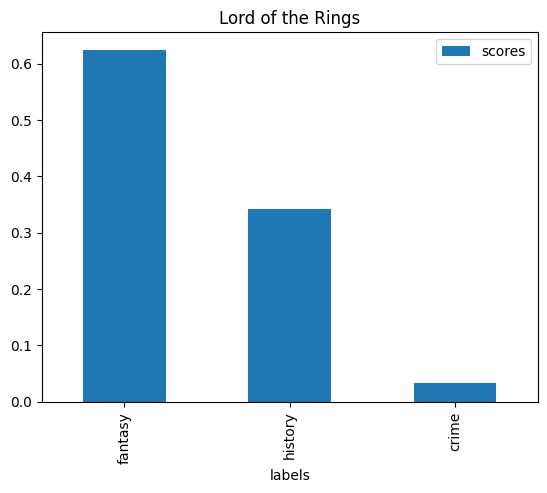

In [6]:
#%% visualize results
pd.DataFrame(res[1]).plot.bar(x='labels', y='scores', title='Lord of the Rings')

In [7]:
# %% flag multiple labels
classifier(documents[0], candidate_labels = candidate_labels, multi_label=False)
# %%

{'sequence': 'It was about eleven o’clock in the morning, mid October, with the sun not shining and a look of hard wet rain in the clearness of the foothills. I was wearing my powder-blue suit, with dark blue shirt, tie and display handkerchief, black brogues, black wool socks with dark blue clocks on them. I was neat, clean, shaved and sober, and I didn’t care who knew it. I was everything the well-dressed private detective ought to be. I was calling on four million dollars.',
 'labels': ['crime', 'history', 'fantasy'],
 'scores': [0.4789845943450928, 0.30554771423339844, 0.2154676914215088]}